In [18]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
%matplotlib inline

In [19]:
train = pd.read_csv('raw_data.csv')

In [20]:
train.shape

(1168, 81)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    964 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          70 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [22]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,964.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1160.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,720.240582,56.699486,70.271784,10597.720890,6.095034,5.594178,1971.120719,1985.200342,104.620690,444.345890,...,92.618151,45.256849,20.790240,3.323630,14.023116,1.934075,42.092466,6.377568,2007.815068,181081.876712
std,420.237685,41.814065,25.019386,10684.958323,1.403402,1.116842,30.279560,20.498566,183.996031,466.278751,...,122.796184,64.120769,58.308987,27.261055,52.498520,33.192538,538.941473,2.727010,1.327339,81131.228007
min,1.000000,20.000000,21.000000,1477.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,355.750000,20.000000,59.000000,7560.000000,5.000000,5.000000,1954.000000,1968.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,716.500000,50.000000,69.500000,9463.000000,6.000000,5.000000,1972.000000,1994.000000,0.000000,384.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162950.000000
75%,1080.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.250000,706.500000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,...,736.000000,523.000000,330.000000,407.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df = pd.read_csv("raw_data.csv")
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
DATA CLEANING

In [23]:
train.drop(columns=['Id'], inplace=True)

In [24]:
columns_with_miss = train.isna().sum()
#filtering only the columns with at least 1 missing value
columns_with_miss = columns_with_miss[columns_with_miss!=0]
#The number of columns with missing values
print('Columns with missing values:', len(columns_with_miss))
#sorting the columns by the number of missing values descending
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 19


PoolQC          1164
MiscFeature     1129
Alley           1098
Fence            951
MasVnrType       699
FireplaceQu      551
LotFrontage      204
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtFinType2      31
BsmtExposure      31
BsmtFinType1      30
BsmtCond          30
BsmtQual          30
MasVnrArea         8
Electrical         1
dtype: int64

In [25]:
# Removing columns with high number of missing values
train.drop(columns=['PoolQC', 'MiscFeature', \
'Alley', 'Fence'], inplace=True)

In [26]:
train['FireplaceQu'].fillna(0, inplace=True)
train['FireplaceQu'].replace({'Po': 1, 'Fa': 2, \
'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

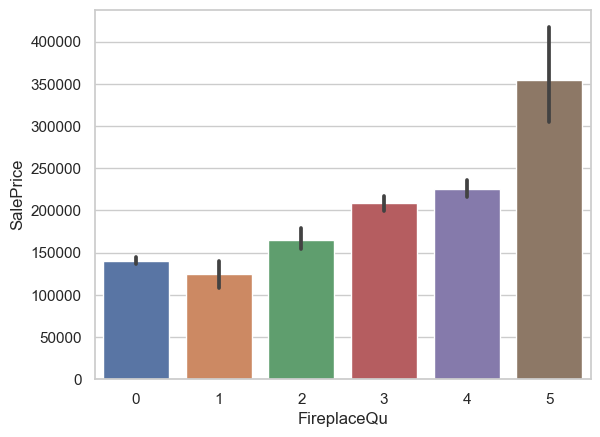

In [27]:
sns.set(style="whitegrid")
sns.barplot(x='FireplaceQu', y="SalePrice", data=train)

In [28]:
# Check columns with missing values
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss != 0]
columns_with_miss = list(columns_with_miss.index)

# Exclude non-numeric columns and 'SalePrice'
numeric_columns = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]
columns_to_correlate = [col for col in numeric_columns if col not in columns_with_miss]
columns_to_correlate.append('SalePrice')

# Calculate correlation
correlation_matrix = train[columns_to_correlate].corr()

# Display correlation matrix
print(correlation_matrix)

               MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
MSSubClass       1.000000 -0.124039     0.020317    -0.059349   0.035248   
LotArea         -0.124039  1.000000     0.102837    -0.001531   0.019063   
OverallQual      0.020317  0.102837     1.000000    -0.085808   0.573846   
OverallCond     -0.059349 -0.001531    -0.085808     1.000000  -0.386590   
YearBuilt        0.035248  0.019063     0.573846    -0.386590   1.000000   
YearRemodAdd     0.020322  0.020700     0.550155     0.075157   0.572995   
BsmtFinSF1      -0.060910  0.209907     0.230930    -0.035088   0.250752   
BsmtFinSF2      -0.052247  0.109011    -0.052257     0.031935  -0.037616   
BsmtUnfSF       -0.154396  0.007615     0.315781    -0.132074   0.146841   
TotalBsmtSF     -0.235451  0.265041     0.534498    -0.156021   0.392666   
1stFlrSF        -0.259543  0.300597     0.477000    -0.130391   0.287848   
2ndFlrSF         0.300062  0.038920     0.322934     0.030820   0.032616   
LowQualFinSF

In [29]:
cols_to_be_removed = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']
train.drop(columns=cols_to_be_removed, inplace=True)

In [30]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 11


MasVnrType      699
GarageType       69
GarageFinish     69
GarageQual       69
GarageCond       69
BsmtExposure     31
BsmtFinType2     31
BsmtQual         30
BsmtCond         30
BsmtFinType1     30
Electrical        1
dtype: int64

In [ ]:
HANDLING MISSING VALUES

In [31]:
# Fills NA in place of NaN
for c in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1']:
    train[c].fillna('NA', inplace=True)
# Fills None in place of NaN
train['MasVnrType'].fillna('None', inplace=True)

In [32]:
columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 5


GarageQual    69
GarageCond    69
BsmtQual      30
BsmtCond      30
Electrical     1
dtype: int64

In [33]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
for col in ord_cols:
    train[col].fillna(0, inplace=True)
    train[col].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)

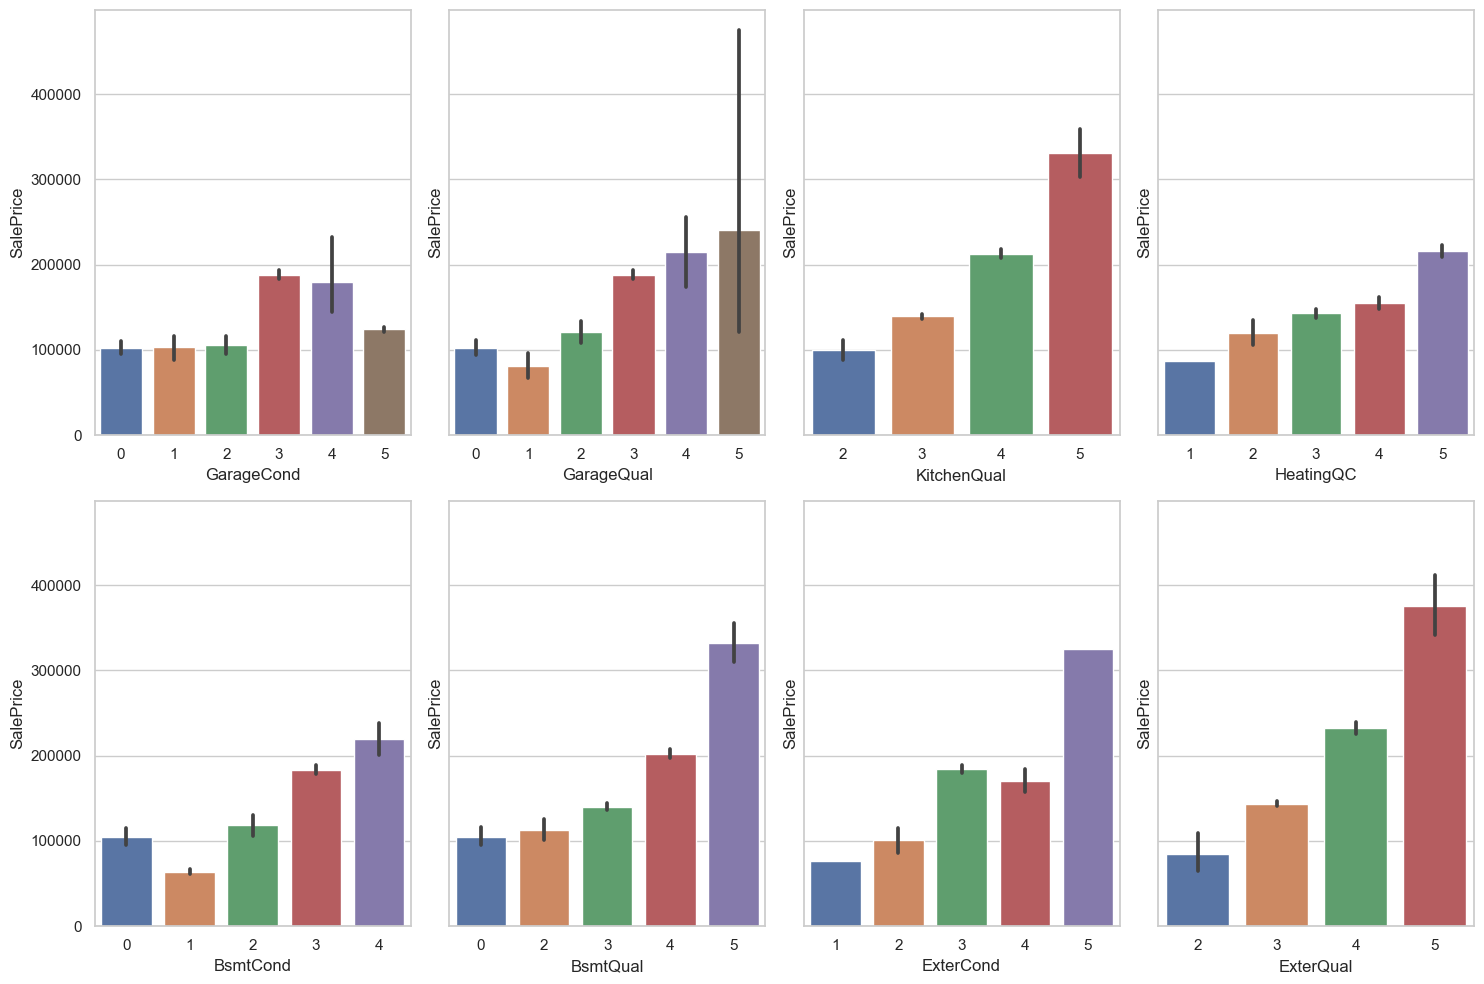

In [34]:
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
f, axes = plt.subplots(2, 4, figsize=(15, 10), sharey=True)

for r in range(0, 2):
    for c in range(0, 4):
        sns.barplot(x=ord_cols.pop(), y="SalePrice", data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()

In [35]:
cols = train.columns
num_cols = train._get_numeric_data().columns
nom_cols = list(set(cols) - set(num_cols))
print(f'Nominal columns: {len(nom_cols)}')

value_counts = {}
for c in nom_cols:
    value_counts[c] = len(train[c].value_counts())

sorted_value_counts = {k: v for k, v in sorted(value_counts.items(), key=lambda item: item[1])}
sorted_value_counts

Nominal columns: 30


{'CentralAir': 2,
 'Utilities': 2,
 'Street': 2,
 'PavedDrive': 3,
 'LandSlope': 3,
 'MasVnrType': 4,
 'LotShape': 4,
 'LandContour': 4,
 'GarageFinish': 4,
 'MSZoning': 5,
 'BsmtExposure': 5,
 'Heating': 5,
 'BldgType': 5,
 'LotConfig': 5,
 'Electrical': 5,
 'SaleCondition': 6,
 'Foundation': 6,
 'RoofStyle': 6,
 'BsmtFinType2': 7,
 'BsmtFinType1': 7,
 'GarageType': 7,
 'RoofMatl': 7,
 'Functional': 7,
 'Condition2': 8,
 'HouseStyle': 8,
 'Condition1': 9,
 'SaleType': 9,
 'Exterior1st': 15,
 'Exterior2nd': 16,
 'Neighborhood': 25}

In [38]:
#Nominal Values

nom_cols_less_than_6 = []
for c in nom_cols:
    n_values = len(train[c].value_counts())
    if n_values < 7:
        nom_cols_less_than_6.append(c)

In [39]:
print(f'Nominal columns with less than 6 values: {len(nom_cols_less_than_6)}')

Nominal columns with less than 6 values: 18


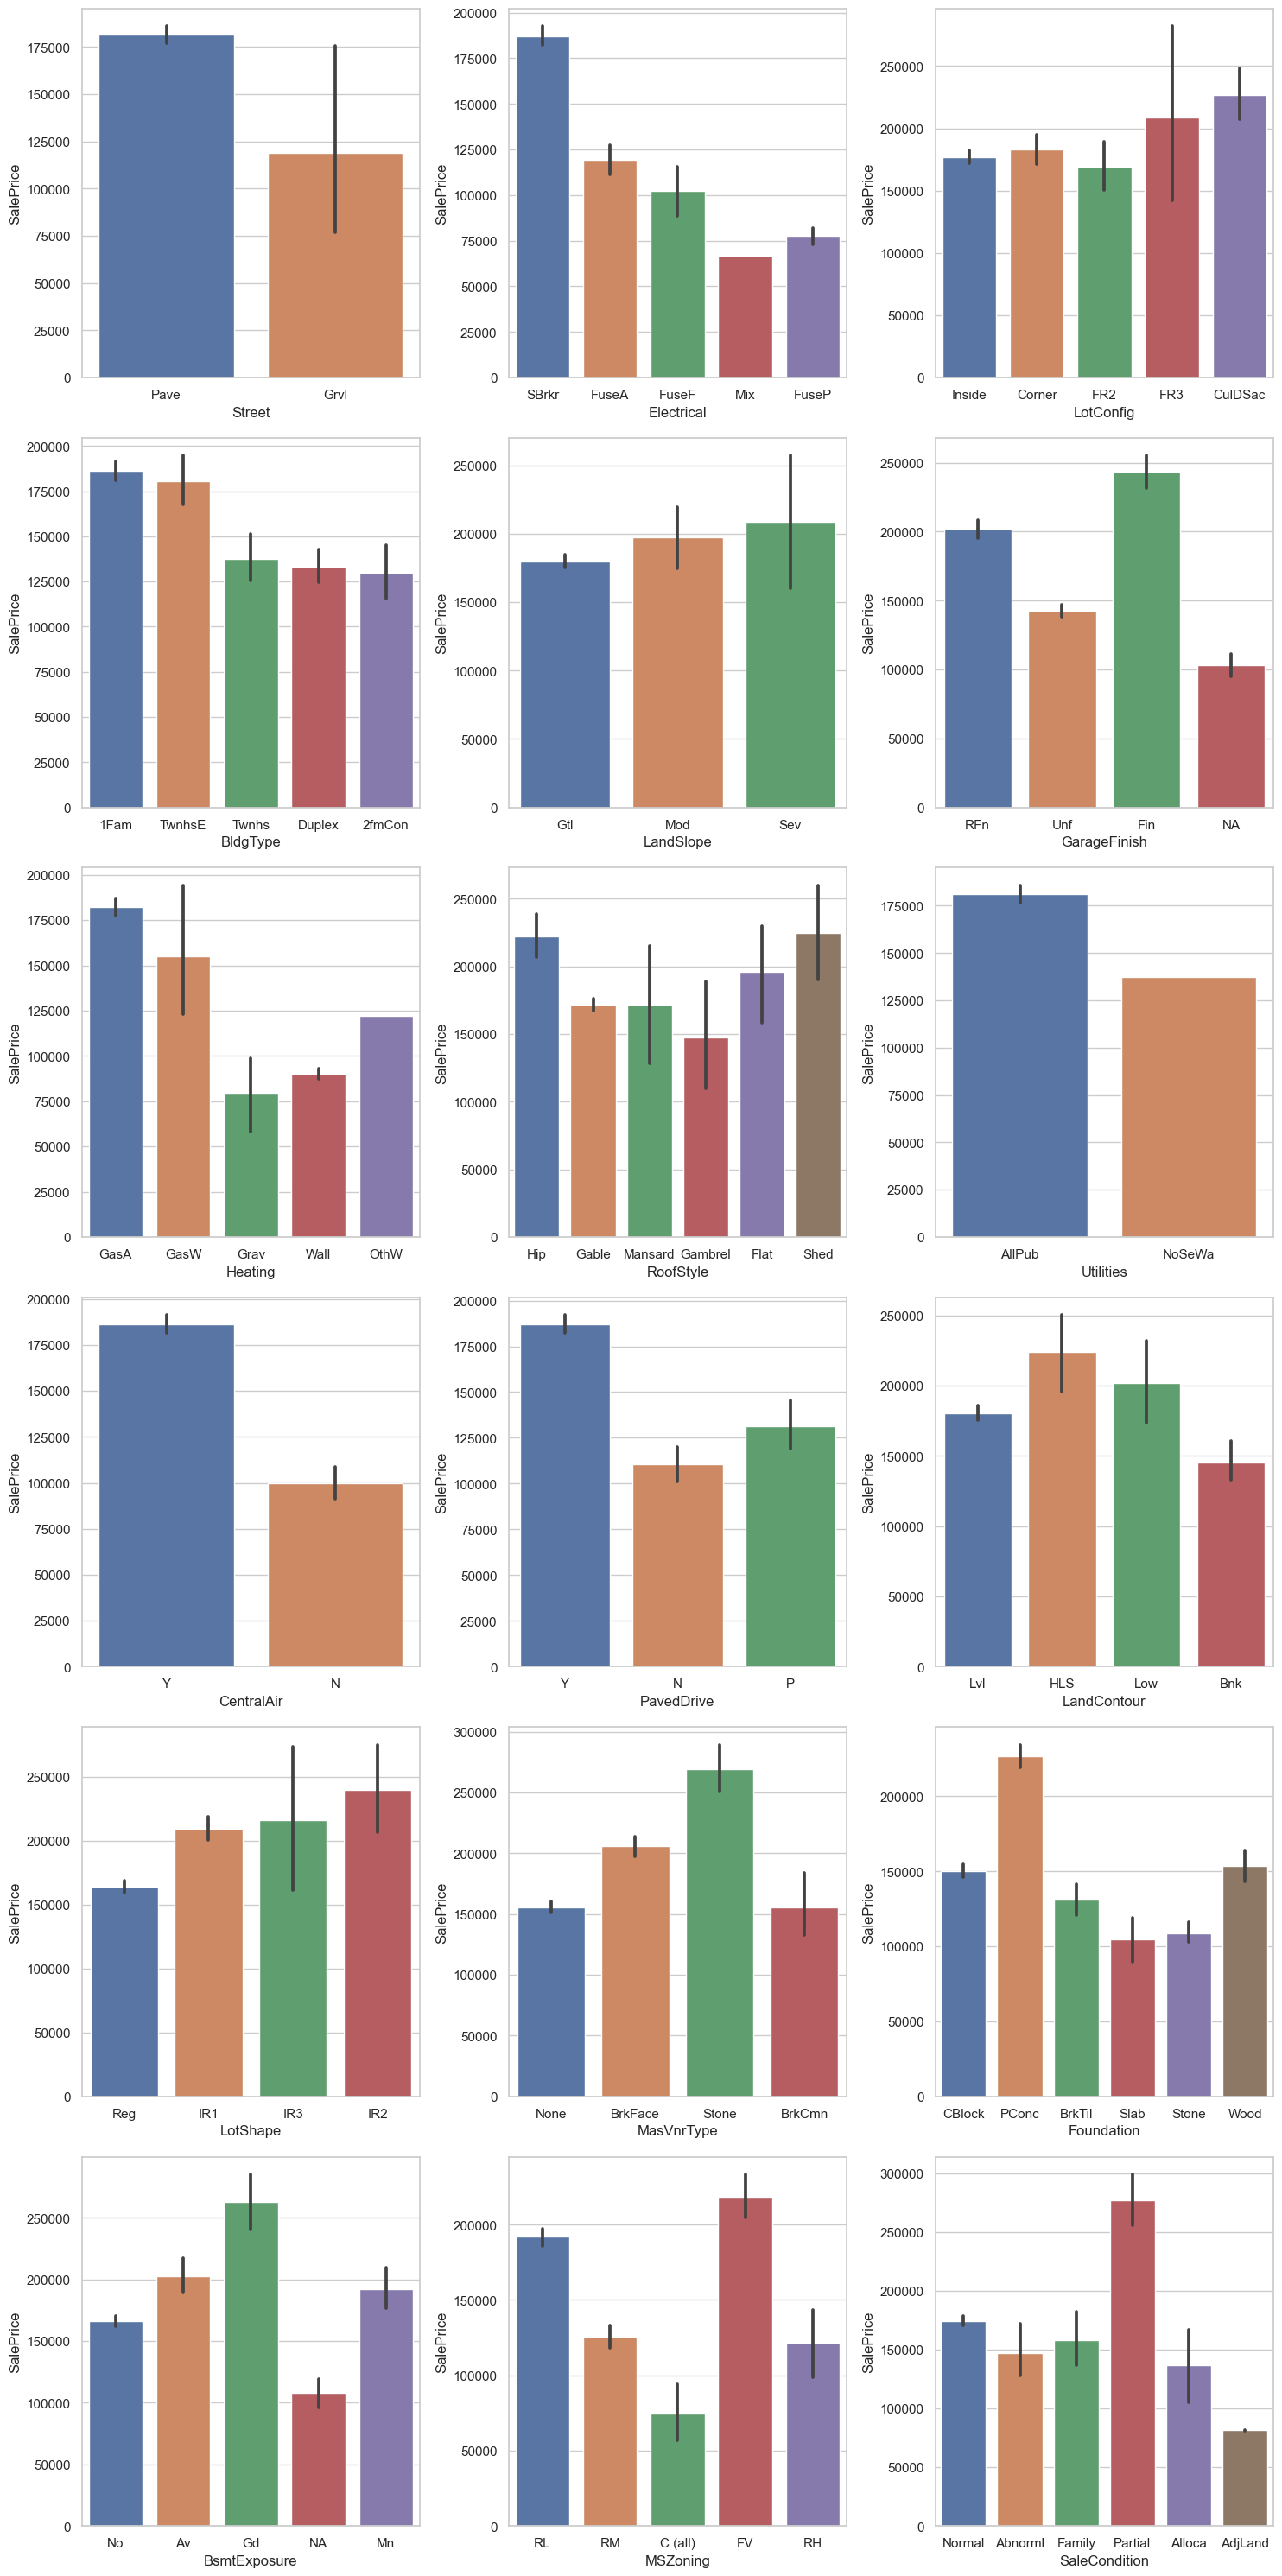

In [40]:
ncols = 3
nrows = math.ceil(len(nom_cols_less_than_6) / ncols)
f, axes = plt.subplots(nrows, ncols, figsize=(15, 30))

for r in range(0, nrows):
    for c in range(0, ncols):
        if not nom_cols_less_than_6:
            continue
        sns.barplot(x=nom_cols_less_than_6.pop(), y="SalePrice", data=train, ax=axes[r][c])

plt.tight_layout()
plt.show()

In [41]:
train['Electrical'].fillna('SBrkr', inplace=True)

In [42]:
#Zero Values

train.isin([0]).sum().sort_values(ascending=False).head(25)

PoolArea         1164
LowQualFinSF     1148
3SsnPorch        1148
MiscVal          1131
BsmtHalfBath     1097
ScreenPorch      1079
BsmtFinSF2       1033
EnclosedPorch    1007
HalfBath          727
BsmtFullBath      686
2ndFlrSF          655
WoodDeckSF        610
Fireplaces        551
FireplaceQu       551
OpenPorchSF       534
BsmtFinSF1        382
BsmtUnfSF          98
GarageCars         69
GarageArea         69
GarageQual         69
GarageCond         69
BsmtCond           30
TotalBsmtSF        30
BsmtQual           30
FullBath            8
dtype: int64

In [43]:
# Outliners

numerical_columns = list(train.dtypes[train.dtypes == 'int64'].index)
len(numerical_columns)

43

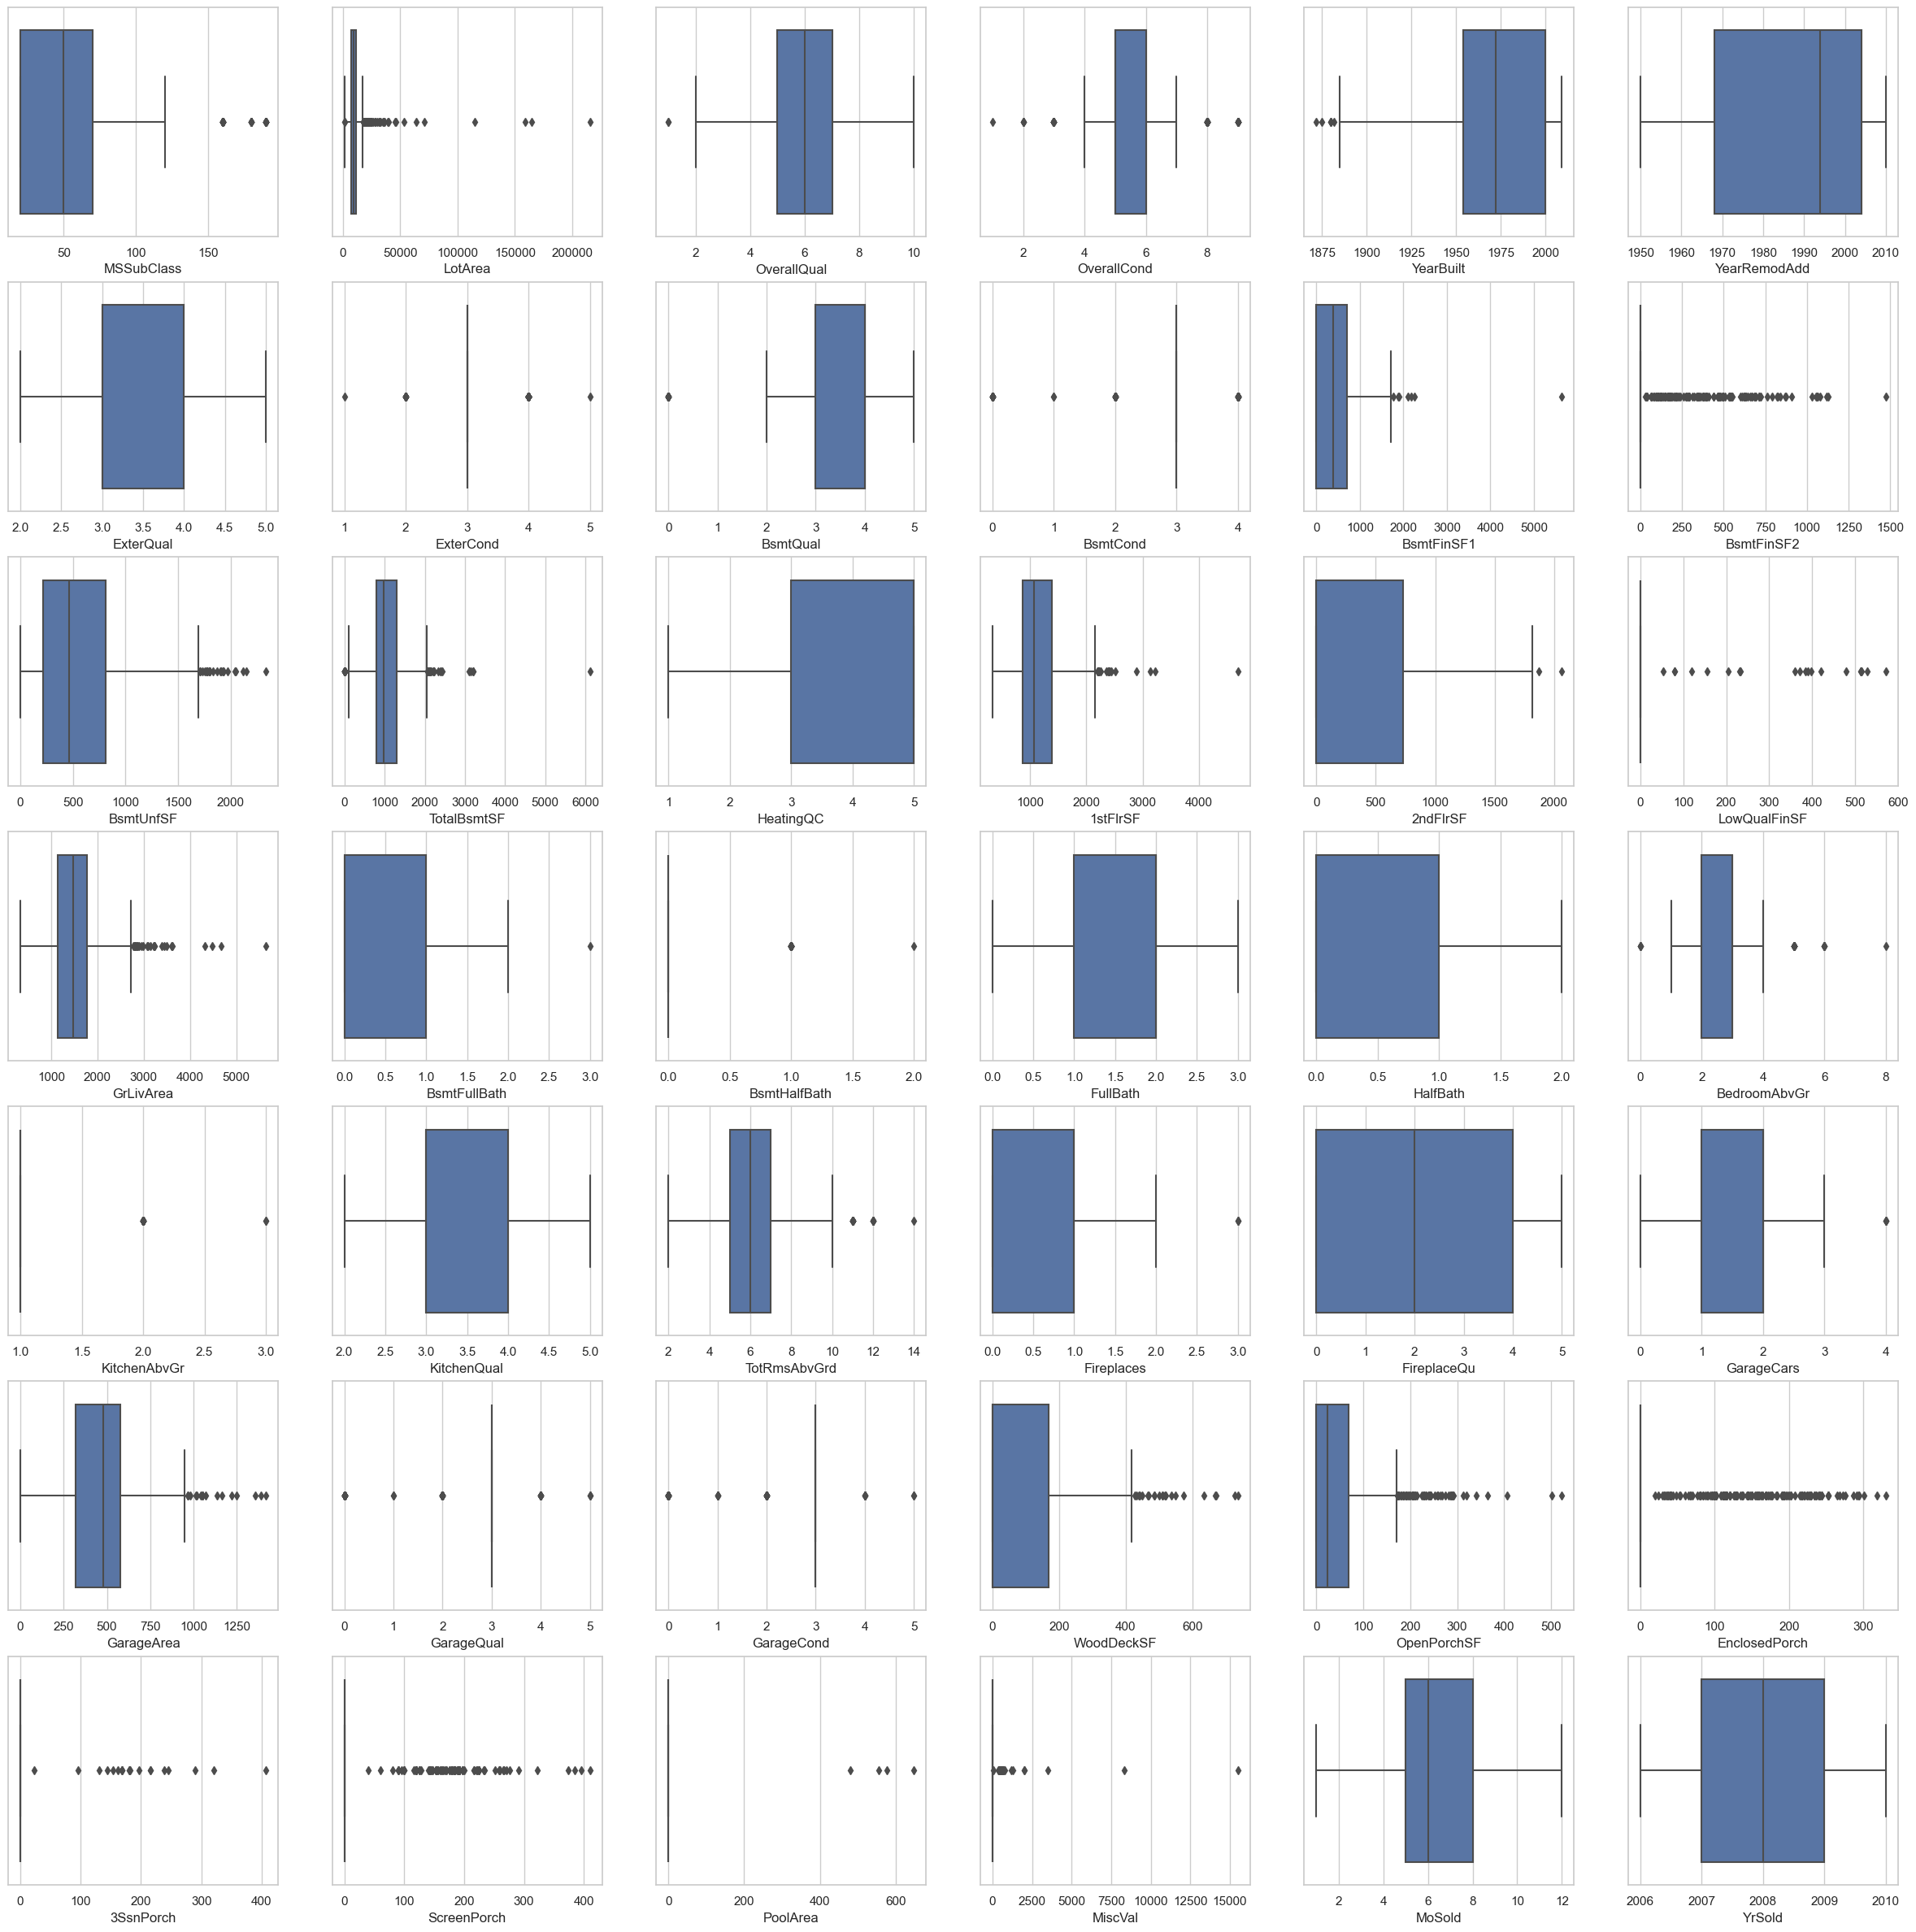

In [47]:
rows = 7
columns = 6
fig, axes = plt.subplots(rows, columns, figsize=(30, 30))

x, y = 0, 0
for i, column in enumerate(numerical_columns):
    if x < rows and y < columns:
        sns.boxplot(x=train[column], ax=axes[x, y])
    else:
        break
    
    if y < columns - 1:
        y += 1
    else:
        x += 1
        y = 0

In [48]:
#Saving cleaned data

columns_with_miss = train.isna().sum()
columns_with_miss = columns_with_miss[columns_with_miss!=0]
print(f'Columns with missing values: {len(columns_with_miss)}')
columns_with_miss.sort_values(ascending=False)

Columns with missing values: 0


Series([], dtype: int64)

In [49]:
train.shape

(1168, 73)

In [50]:
train.head(3).T

,0,1,2
MSSubClass,20,60,30
MSZoning,RL,RL,RM
LotArea,8414,12256,8960
Street,Pave,Pave,Pave
LotShape,Reg,IR1,Reg
...,...,...,...
MoSold,2,4,3
YrSold,2006,2010,2010
SaleType,WD,WD,WD
SaleCondition,Normal,Normal,Normal


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1168 non-null   int64 
 1   MSZoning       1168 non-null   object
 2   LotArea        1168 non-null   int64 
 3   Street         1168 non-null   object
 4   LotShape       1168 non-null   object
 5   LandContour    1168 non-null   object
 6   Utilities      1168 non-null   object
 7   LotConfig      1168 non-null   object
 8   LandSlope      1168 non-null   object
 9   Neighborhood   1168 non-null   object
 10  Condition1     1168 non-null   object
 11  Condition2     1168 non-null   object
 12  BldgType       1168 non-null   object
 13  HouseStyle     1168 non-null   object
 14  OverallQual    1168 non-null   int64 
 15  OverallCond    1168 non-null   int64 
 16  YearBuilt      1168 non-null   int64 
 17  YearRemodAdd   1168 non-null   int64 
 18  RoofStyle      1168 non-null

In [52]:
train.to_csv('train-cleaned.csv')

We addressed missing values in the dataset by performing the following actions:

Removed the columns 'Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'LotFrontage', 'GarageYrBlt', and 'MasVnrArea' as they contained missing values.

Replaced the NaN values with 'NA' in the columns 'GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', and 'BsmtFinType1'.

Replaced the NaN values with 'None' in the column 'MasVnrType'.

Imputed the most frequent value in place of NaN in the column 'Electrical'.